In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display


In [9]:
df = pd.read_csv('players_21.csv')
cols_to_drop = df.select_dtypes(include=['object']).columns
df = df.drop(columns=cols_to_drop)
df = df.dropna(axis=0, how='all')
df.head()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,33,170,72,1.0,93,93,67500000,560000,5,...,75,96,NaN,35,24,6,11,15,14,8
1,20801,35,187,83,1.0,92,92,46000000,220000,5,...,84,95,NaN,32,24,7,11,15,14,11
2,200389,27,188,87,1.0,91,93,75000000,125000,3,...,11,68,NaN,12,18,87,92,78,90,90
3,188545,31,184,80,1.0,91,91,80000000,240000,4,...,88,88,NaN,42,19,15,6,12,8,10
4,190871,28,175,68,1.0,91,91,90000000,270000,5,...,92,93,NaN,30,29,9,9,15,15,11


In [22]:
df.sort_values(by='value_eur', ascending=False).head()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
6,231747,21,178,73,1.0,90,95,105500000,160000,3,...,70,84,NaN,34,32,13,5,7,11,6
4,190871,28,175,68,1.0,91,91,90000000,270000,5,...,92,93,NaN,30,29,9,9,15,15,11
5,192985,29,181,70,1.0,91,91,87000000,370000,4,...,84,91,NaN,65,53,15,13,5,10,13
3,188545,31,184,80,1.0,91,91,80000000,240000,4,...,88,88,NaN,42,19,15,6,12,8,10
10,208722,28,175,69,1.0,90,90,78000000,250000,3,...,71,84,NaN,42,38,10,10,15,7,14


### Parte 1: Predicción del valor de mercado ###

a) **Recta de regresión para predecir el valor de mercado de un jugador** a partir de la característica más relevante (a la que se destinará mayor proporción del presupuesto)
<br><br>
Mi objetivo es predecir el valor de mercado de un jugador, por lo tanto, esta será mi variable dependiente Y.<br>
Para ello, yo voy a elegir la caracteristica más relevante, que sera mi variable independiente X. La variable elegida es "wage_eur", es decir, **salarios en euros**.
<br><br>
Para observar el comportamiento de estas dos variables voy a construir un gráfico de dispersión.

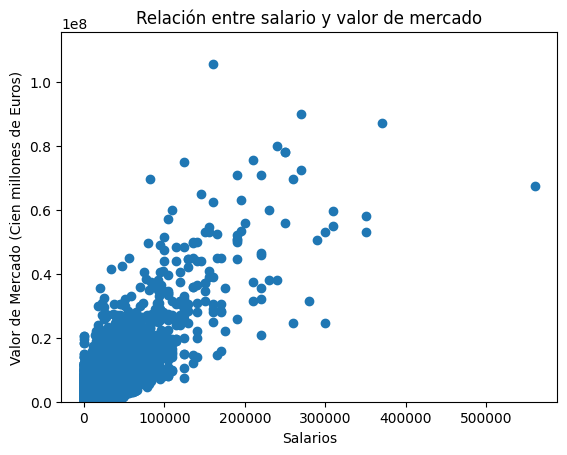

In [23]:
x = df["wage_eur"]
y = df["value_eur"]
plt.scatter(x, y)
plt.xlabel('Salarios')
plt.ylabel('Valor de Mercado (Cien millones de Euros)')
plt.title('Relación entre salario y valor de mercado')
plt.ylim(min(y), max(y) + 10000000)


plt.show()

Esta claro por el gráfico que el precio de mercado de los jugadores no está enteramente determinado por su salario, sin embargo si puede observarse una relacion lineal sustancial entre ambas variables.
Debo entonces encontrar la recta que mejor se ajuste a los datos observados.
Para calcular la recta de regresión debo aplicar el método de Mínimos cuadrados.
La línea de mínimos cuadrados tiene la ecuación:
y=B0+B1 * x

Tengo que estimar los valores de B0 y B1 para encontrar la recta de regresión.
Para eso voy a calcular una serie de variables.

In [26]:
n = df["wage_eur"].count()
sum_x = df["wage_eur"].sum()
media_x = df["wage_eur"].mean()
sum_y = df["value_eur"].sum()
media_y = df["value_eur"].mean()
suma_multiplicaciones = (df['wage_eur'] * df['value_eur']).sum()
sum_cuadrados_x = (df["wage_eur"] ** 2).sum()

Con estos valores, puedo calcular Sxy y Sxx y, con estos, calcular la pendiente y la ordenada de mi recta de regresion:

In [33]:
Sxy = suma_multiplicaciones - (sum_x * sum_y / n)
Sxx = sum_cuadrados_x - (sum_x ** 2) / n
pendiente = Sxy/Sxx
ordenada = media_y - pendiente * media_x

display(Markdown(f"Entonces, la ecuación de la recta queda:"))
display(Markdown("y = B0 + B1 * x"))
display(Markdown(f"y = {ordenada} + {pendiente} * x"))

Entonces, la ecuación de la recta queda:

y = B0 + B1 * x

y = 332598.8216281582 + 218.10127217079443 * x

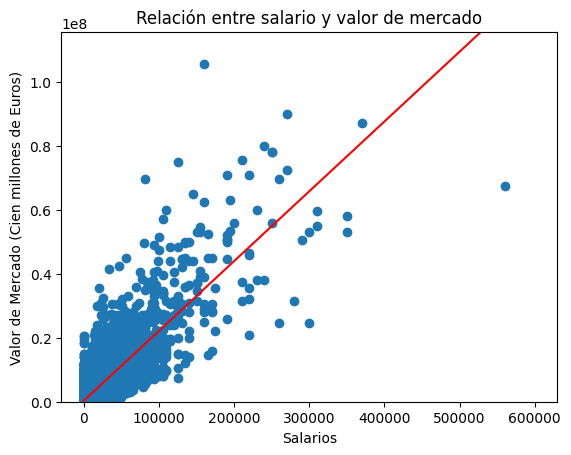

In [44]:
x = df["wage_eur"]
y = df["value_eur"]
plt.scatter(x, y)
valores_x = np.linspace(0,600000, 200)
valores_y = pendiente * valores_x + ordenada
# Dibujar la recta en el gráfico
plt.plot(valores_x, valores_y, color='red', label='Recta de regresión')
plt.xlabel('Salarios')
plt.ylabel('Valor de Mercado (Cien millones de Euros)')
plt.title('Relación entre salario y valor de mercado')
plt.ylim(min(y), max(y) + 10000000)


plt.show()

*i) Prueba de significancia de regresión, coeficiente de determinación (R2) y
correlación lineal (r).* <br> <br>


*ii) Inferencias sobre los parámetros de la recta, estimando las fluctuaciones con una confianza del 95%.* <br> <br>


*iii) La proporción de veces que el valor de mercado supera la incertidumbre de predicción comparada con la respuesta media del valor de mercado para una característica fija, ambas con la misma confianza y ancho mínimo.* <br> <br>